In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

import datetime

import pandas as pd
import matplotlib.pyplot as plt

from world_rowing import api, livetracker, utils, dashboard

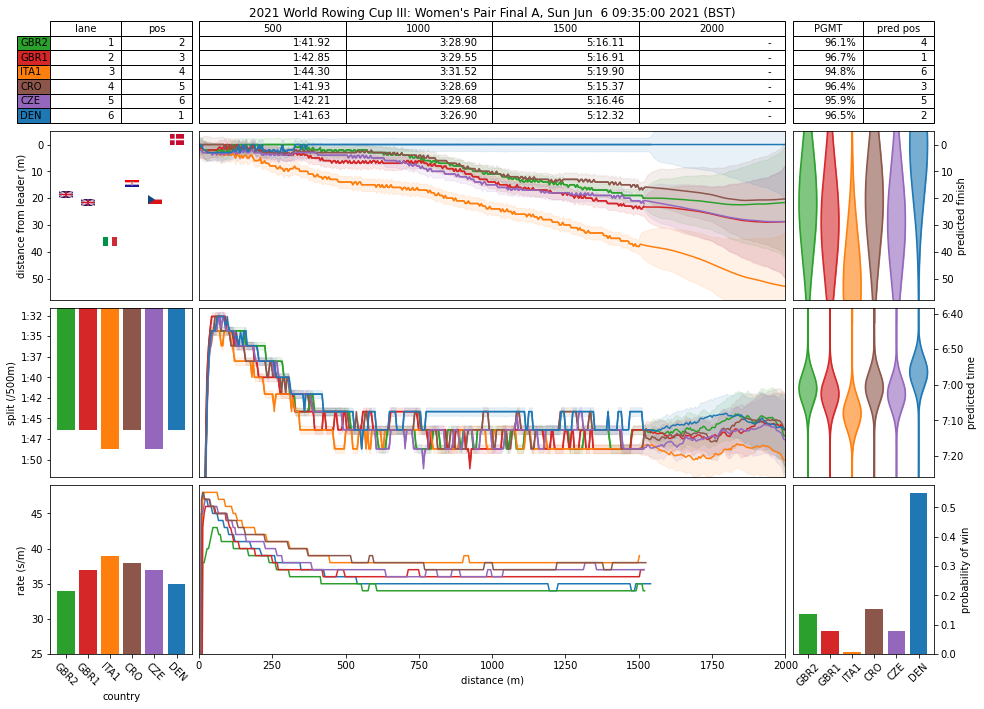

In [ ]:
dash = dashboard.Dashboard.load_last_race(figsize=(14, 10))
dash.live_dashboard()
api.show_next_races()